# Tutorial #10: nDarrays

A comonly used tool for analyzing data from a telescope in high-energy astrophysics is a detector response matrix ($R_{ij}$). It's a 2D array that carries information of both a telescope's "effective area" and its energy resolution. 

Here you are given the detector response matrix as a 2D array, (<tt>R</tt>) and will be given tasks to manipulate the array. You will decomposed the matrix into its components, the effective area and the binned energy resolution. 

In [1]:
# Execute this cell to create the detector response matrix (R), array of photon energies, and measured energy bins

import numpy as np

# Photon energies in keV
Photon_Energies = np.arange(1, 6)
print('Photon_Energies (keV) =', Photon_Energies)

# Measured energy bins in keV
# Ex: bin 1 spans Energy_bin_low[1] to Energy_bin_hi[1]
Energy_bin_low = np.linspace(0.5, 6.5, 7)
Energy_bin_hi = np.linspace(1.5, 7.5, 7)
print('The begining of the measured energy bins (keV) =')
print(Energy_bin_low)
print('The end of the measured energy bins (keV) =')
print(Energy_bin_hi)


# the detector response matrix in units of (cm^2)
R = np.array([[1.4  , 0.4  , 0.2  , 0.   , 0.   , 0.   , 0.   ],
       [0.3  , 2.1  , 0.3  , 0.15 , 0.075, 0.075, 0.   ],
       [0.2  , 0.4  , 2.8  , 0.4  , 0.12 , 0.08 , 0.   ],
       [0.105, 0.175, 0.35 , 2.45 , 0.21 , 0.14 , 0.07 ],
       [0.05 , 0.1  , 0.15 , 0.25 , 1.75 , 0.15 , 0.05 ]])
print('The detector response matrix is (cm^2)')
print(R)

Photon_Energies (keV) = [1 2 3 4 5]
The begining of the measured energy bins (keV) =
[0.5 1.5 2.5 3.5 4.5 5.5 6.5]
The end of the measured energy bins (keV) =
[1.5 2.5 3.5 4.5 5.5 6.5 7.5]
The detector response matrix is (cm^2)
[[1.4   0.4   0.2   0.    0.    0.    0.   ]
 [0.3   2.1   0.3   0.15  0.075 0.075 0.   ]
 [0.2   0.4   2.8   0.4   0.12  0.08  0.   ]
 [0.105 0.175 0.35  2.45  0.21  0.14  0.07 ]
 [0.05  0.1   0.15  0.25  1.75  0.15  0.05 ]]


1. What are the shapes of the arrays,
- the detector response matrix
- the photon energies 
- the measured energy bins

In [2]:
print(f"The Detector Response Matrix is a(n) {R.ndim}D array with shape {R.shape}")
print(f"The Photon Energy array is a(n) {Photon_Energies.ndim}D array with shape {Photon_Energies.shape}")
print(f"The Measured Low-Energy Bin is a(n) {Energy_bin_low.ndim}D array with shape {Energy_bin_low.shape}")
print(f"The Measured High-Energy Bin is a(n) {Energy_bin_hi.ndim}D array with shape {Energy_bin_hi.shape}")

The Detector Response Matrix is a(n) 2D array with shape (5, 7)
The Photon Energy array is a(n) 1D array with shape (5,)
The Measured Low-Energy Bin is a(n) 1D array with shape (7,)
The Measured High-Energy Bin is a(n) 1D array with shape (7,)


2. Find the effective area at each photon energy in <tt>Photon_Energies</tt>, 
- assign it to a variable called <tt>Aeff</tt> as an array with the same length as <tt>Photon_Energies</tt> 
- and make a plot with <tt>Photon_Energies</tt> on the x-axis and <tt>Aeff</tt> the y-axis

Hint: Remember one row of $R_{ij}$ (<tt>R[i,:]</tt>) = $A_{eff} * P_j$ where $P_j$ is the probability the photon is measured with an energy in bin j. The probabilitiy is properly normalized ($\sum_j P_j = 1$), so what would $\sum_j R_{ij}$ equal for a specific i index? 

[0. 0. 0. 0. 0.]
[2.  3.  4.  3.5 2.5]


Text(0.5, 1.0, 'Effective Area vs. Photon Energy')

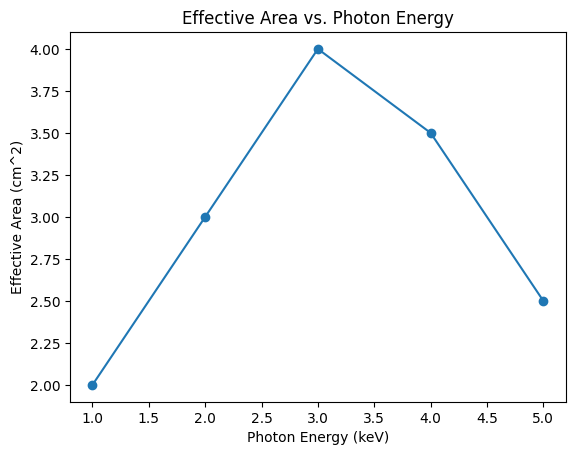

In [3]:
import matplotlib.pyplot as plt

Aeff = np.zeros(R.shape[0])
print(Aeff)
for i in range(len(Aeff)):
    Aeff[i] = np.sum(R[i,:])

print(Aeff)

plt.plot(Photon_Energies, Aeff, 'o-')
plt.xlabel('Photon Energy (keV)')
plt.ylabel('Effective Area (cm^2)')
plt.title('Effective Area vs. Photon Energy')


3. Find the probability of a 2 keV photon being measured in each energy bin. 

And plot it with the probability on the y-axis and the midpoint of each energy bin on the x-axis, with the marker as a circle

[0.1   0.7   0.1   0.05  0.025 0.025 0.   ]


Text(0.5, 1.0, 'Probability of 2 keV photon landing in each measured energy bin')

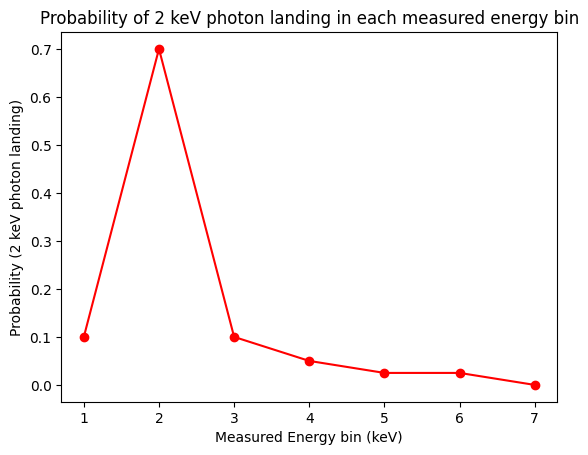

In [4]:
# Prob 2kev = DNR(2kev) / Aeff(2kev)
p_2kev = R[1]/Aeff[1]
print(p_2kev)
mdpt_energy_bin = (Energy_bin_hi+Energy_bin_low)/2
plt.plot(mdpt_energy_bin, p_2kev,'o-r')
plt.ylabel('Probability (2 keV photon landing)')
plt.xlabel('Measured Energy bin (keV)')
plt.title('Probability of 2 keV photon landing in each measured energy bin')